In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings("ignore")

In [3]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

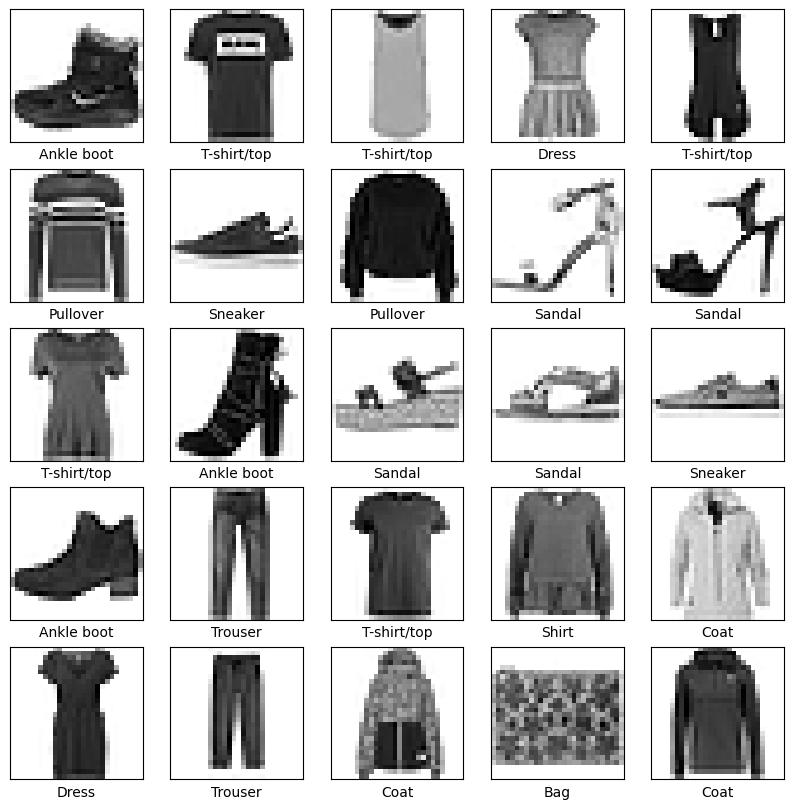

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', name='conv-layer-1'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
    tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    tf.keras.layers.Dense(len(class_names), activation="softmax", name="output-layer")
])

In [8]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [9]:
history = model.fit(trainX, trainY_cat, epochs=10, validation_data=(testX, testY_cat))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6161 - loss: 1.2934 - val_accuracy: 0.7961 - val_loss: 0.6010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8048 - loss: 0.5540 - val_accuracy: 0.8331 - val_loss: 0.4944
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8360 - loss: 0.4745 - val_accuracy: 0.8475 - val_loss: 0.4460
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8485 - loss: 0.4295 - val_accuracy: 0.8520 - val_loss: 0.4436
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8588 - loss: 0.4050 - val_accuracy: 0.8601 - val_loss: 0.4047
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8682 - loss: 0.3806 - val_accuracy: 0.8540 - val_loss: 0.4081
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8746 - loss: 0.3578 - val_accuracy: 0.8743 - val_loss: 0.3615
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8770 - loss: 0.3543

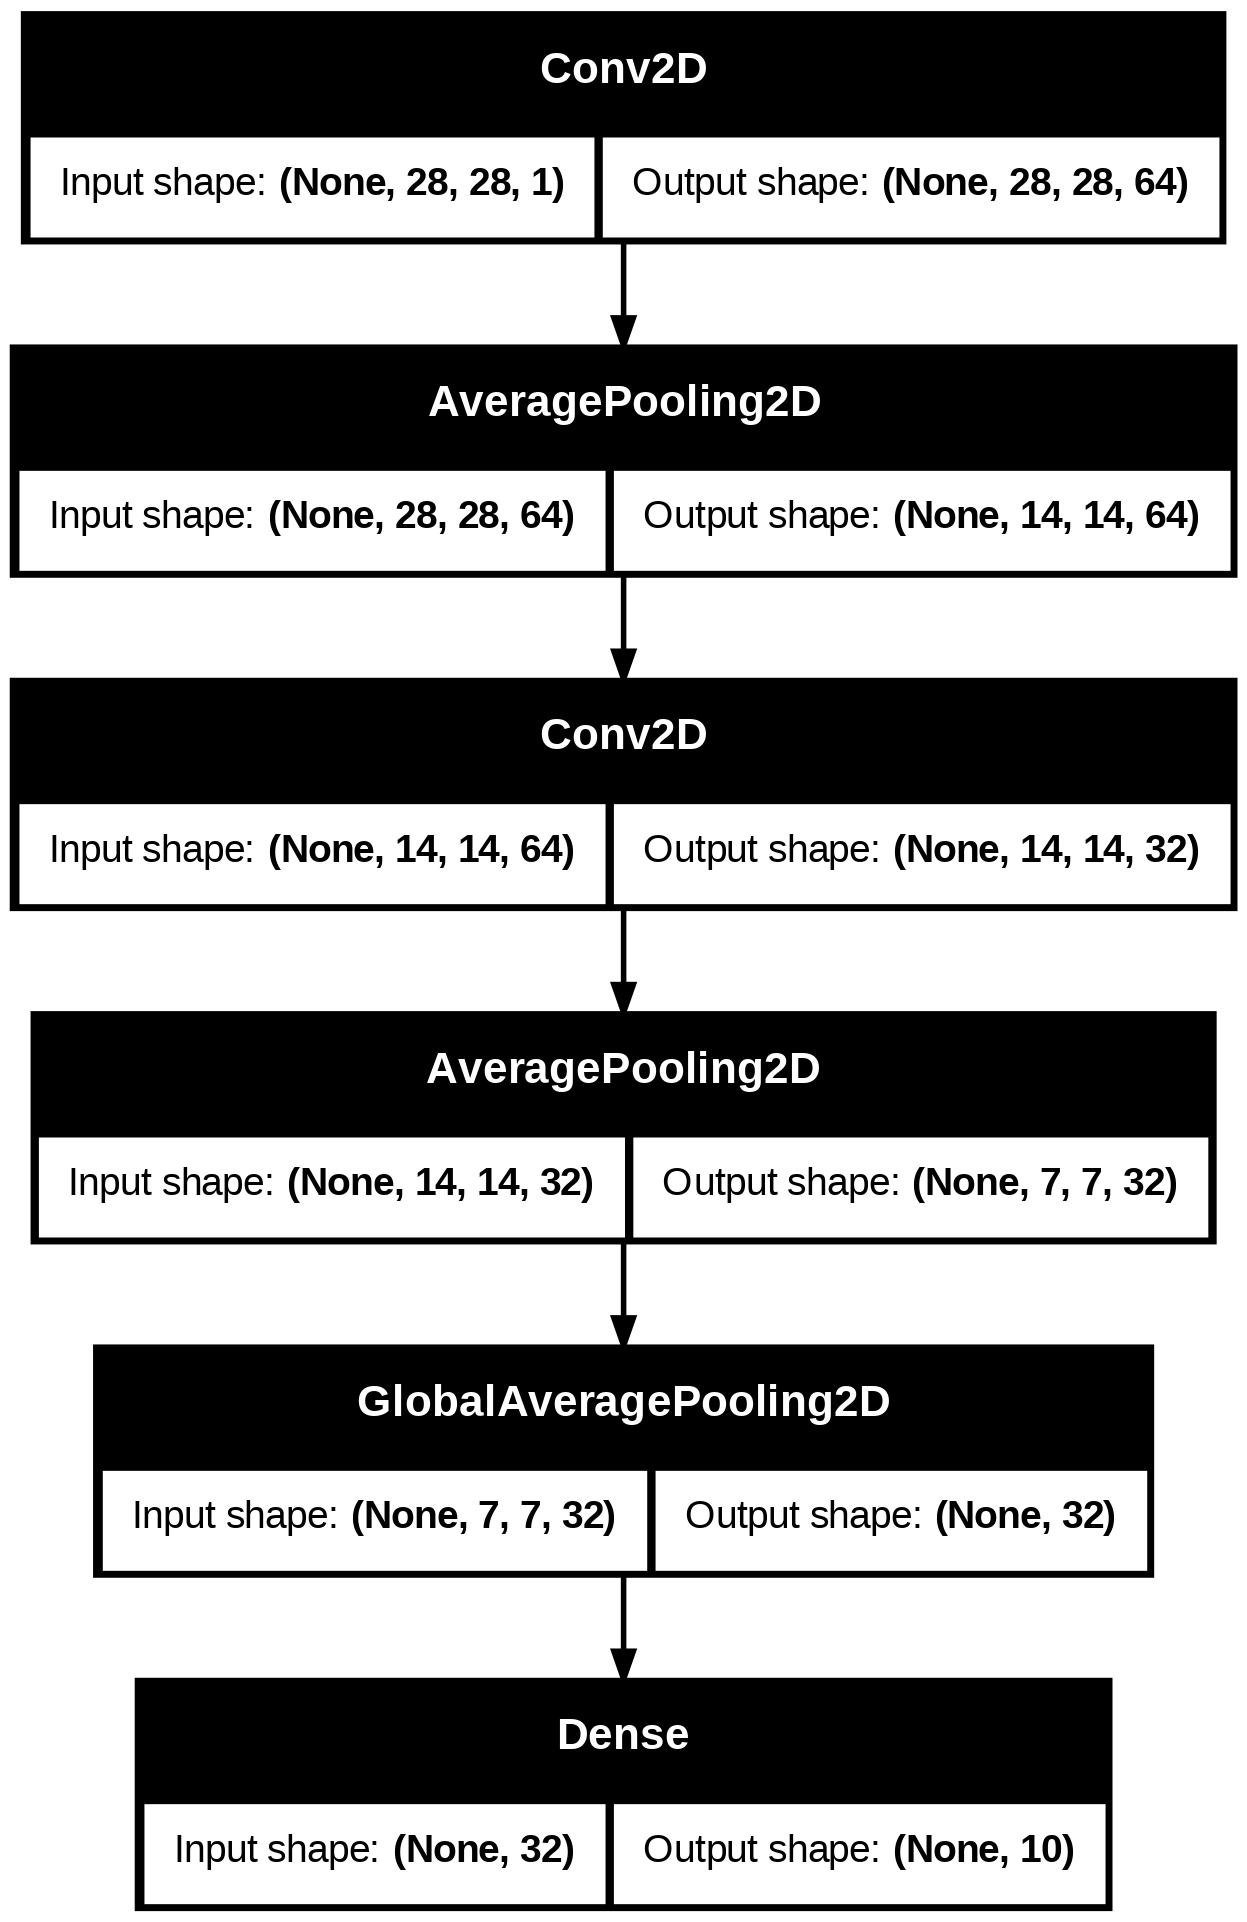

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv-layer-1 (Conv2D)           │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-1                 │ (None, 14, 14, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-layer-2 (Conv2D)           │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-2                 │ (None, 7, 7, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-3                 │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,304 (227.75 KB)

 Trainable params: 19,434 (75.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,870 (151.84 KB)

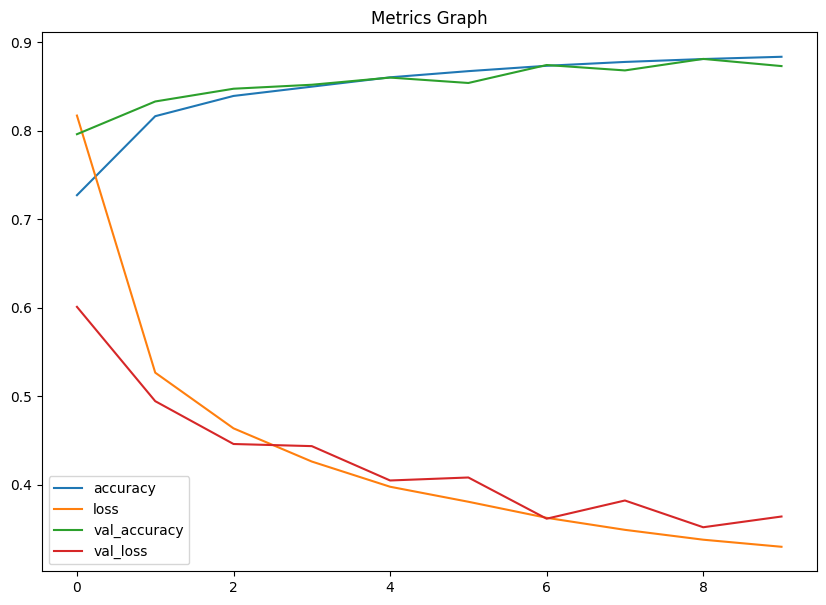

In [12]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [13]:
model.evaluate(testX, testY_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 0.3521


[0.36400407552719116, 0.8730999827384949]

In [14]:
predictions = model.predict(testX)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
predictions = tf.argmax(predictions, axis=1)

In [16]:
y_test = tf.argmax(testY_cat, axis=1)

In [17]:
y_test = tf.Variable(y_test)

In [18]:
print(metrics.accuracy_score(y_test, predictions))

0.8731


In [19]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.87      0.76      0.81      1000
           3       0.89      0.84      0.87      1000
           4       0.64      0.92      0.75      1000
           5       0.98      0.97      0.98      1000
           6       0.78      0.51      0.62      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



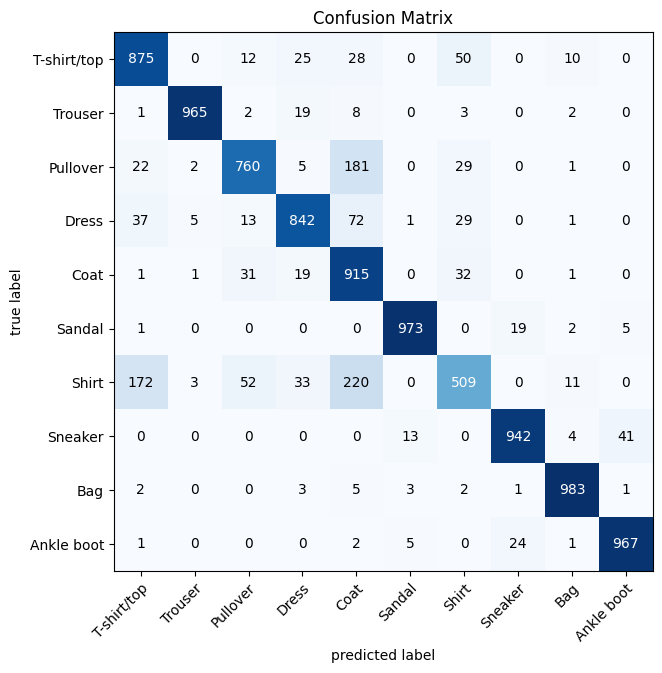

In [20]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


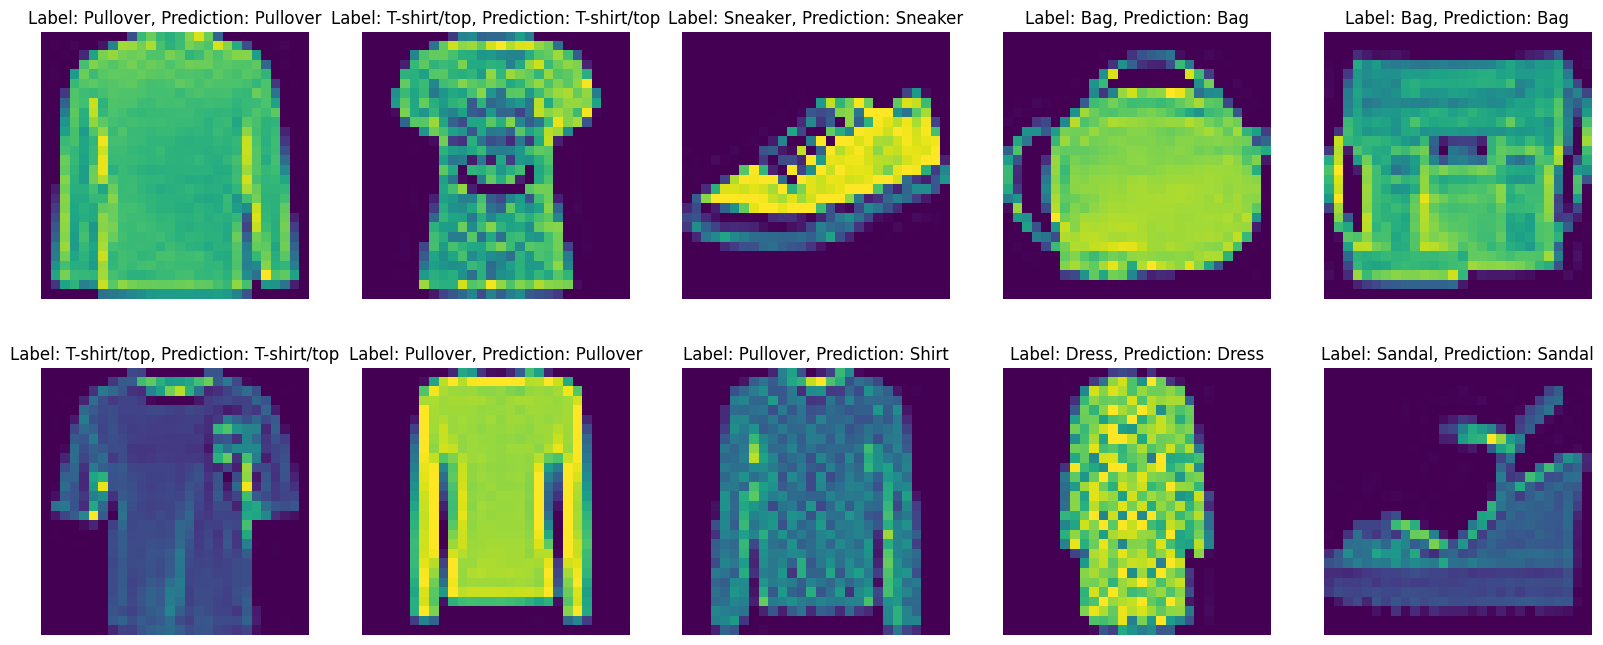

In [21]:
images = []
labels = []
random_indices = random.sample(range(len(testX)), 10)
for idx in random_indices:
    images.append(testX[idx])
    labels.append(testY_cat[idx])
images = np.array(images)
labels = np.array(labels)

fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1
for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label = class_names[tf.argmax(label)]
    plt.title(f"Label: {label}, Prediction: {prediction}")
    plt.imshow(image/255.)
    plt.axis("off")
    x += 1